In [1]:
import pandas as pd

## 주식 데이터

In [2]:
pola_stock = pd.read_csv('../data/get_stock.polaris.csv')

In [3]:
pola_stock = pola_stock.dropna(subset=['date'])

In [4]:
# 전일비 변환작업 및 null값 업데이트

for i in range(len(pola_stock)-1):    
    daily_change = pola_stock['end_price'].iloc[i] - pola_stock['end_price'].iloc[i+1]
    pola_stock['daily_change'].iloc[i] = daily_change

    if i == len(pola_stock)-1:
        pola_stock['daily_change'].iloc[len(pola_stock)] = int(pola_stock['daily_change'].iloc[len(pola_stock)])

C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2644989297.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pola_stock['daily_change'].iloc[i] = daily_change
C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2644989297.py:5: F

## 토큰 데이터

In [28]:
pola_token_get = pd.read_json('../data/pola_token.json')

In [29]:
pola_token_get['data']

t    [1605711600000, 1605798000000, 1605884400000, ...
o    [30.01, 482.9, 595.6, 550, 475.2, 3600, 2960, ...
h    [670, 697.5, 648.1, 600.6, 5000, 3944, 4015, 3...
l    [30.01, 354.6, 527.2, 451.6, 475.2, 2220, 2099...
c    [481, 596, 569.8, 483.5, 3640, 2933, 2821, 801...
v    [97047175.524635668613744039, 684675710.297753...
Name: data, dtype: object

In [30]:
pola_token = pd.DataFrame()
pola_token['timestamp'] = pola_token_get['data'][0]
pola_token['open_price'] = pola_token_get['data'][1]
pola_token['high_price'] = pola_token_get['data'][2]
pola_token['low_price'] = pola_token_get['data'][3]
pola_token['close_price'] = pola_token_get['data'][4]
pola_token['trade_volume'] = pola_token_get['data'][5]

C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2082686699.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pola_token['timestamp'] = pola_token_get['data'][0]
C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2082686699.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pola_token['open_price'] = pola_token_get['data'][1]
C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2082686699.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

In [31]:
pola_token

timestamp open_price high_price low_price close_price  \
0     1605711600000      30.01        670     30.01         481   
1     1605798000000      482.9      697.5     354.6         596   
2     1605884400000      595.6      648.1     527.2       569.8   
3     1605970800000        550      600.6     451.6       483.5   
4     1606057200000      475.2       5000     475.2        3640   
...             ...        ...        ...       ...         ...   
1246  1713366000000       56.5         58      51.2       54.16   
1247  1713452400000      54.16      54.33        46       52.16   
1248  1713538800000      52.17      52.17     49.38       51.17   
1249  1713625200000      51.18      53.77     50.67       51.97   
1250  1713711600000      51.97      53.16     50.68       51.58   

                      trade_volume  
0      97047175.524635668613744039  
1     684675710.297753710545601948  
2     959839313.520329676084903356  
3       9698525.496211397492328175  
4       67830701.70380660742383707  
...                            ...  
1246   51958548.788103589176785507  
1247   42951779.193584789613648723  
1248   15439860.527550924633344107  
1249   22002388.083048372683249285  
1250    7902216.880580430854621639  

[1251 rows x 6 columns]

In [32]:
import datetime

def change_datetime(text):

    # Epoch time을 기준으로 한 초 단위로 변환
    timestamp_s = text / 1000

    # 한국 시간대로 변환
    korea_time = datetime.datetime.utcfromtimestamp(timestamp_s) + datetime.timedelta(hours=9)

    korea_time = korea_time.strftime('%Y-%m-%d')

    return korea_time

In [34]:
pola_token['timestamp'] = pola_token['timestamp'].apply(change_datetime)

In [80]:
pola_token['timestamp'] = pd.to_datetime(pola_token['timestamp'])

C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\360773660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pola_token['timestamp'] = pd.to_datetime(pola_token['timestamp'])


In [85]:
pola_token

timestamp open_price high_price low_price close_price  \
408  2022-01-01      159.3        160     152.1       157.9   
409  2022-01-02      156.4      162.2     154.2       158.4   
410  2022-01-03      157.2        163       155       162.8   
411  2022-01-04      162.8      172.3     157.8       159.7   
412  2022-01-05      160.3      162.6     156.1       159.2   
...         ...        ...        ...       ...         ...   
1246 2024-04-18       56.5         58      51.2       54.16   
1247 2024-04-19      54.16      54.33        46       52.16   
1248 2024-04-20      52.17      52.17     49.38       51.17   
1249 2024-04-21      51.18      53.77     50.67       51.97   
1250 2024-04-22      51.97      53.16     50.68       51.58   

                     trade_volume  
408    1565575.829362954549191129  
409     1705835.86283864502184401  
410    2592596.348313712733729665  
411     3690390.06473519138168622  
412     1187584.23146857699497637  
...                           ...  
1246  51958548.788103589176785507  
1247  42951779.193584789613648723  
1248  15439860.527550924633344107  
1249  22002388.083048372683249285  
1250   7902216.880580430854621639  

[843 rows x 6 columns]

In [86]:
pola_token['close_price'] = pola_token['close_price'].apply(float)

C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2843881075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pola_token['close_price'] = pola_token['close_price'].apply(float)


In [38]:
pola_stock = pola_stock.drop(columns='_id')
pola_stock['date'] = pd.to_datetime(pola_stock['date'])


date  end_price daily_change  start_price  high_price  low_price  \
2    2024-04-22    21950.0        100.0      21650.0     22250.0    21600.0   
3    2024-04-19    21850.0       -400.0      22900.0     23000.0    21250.0   
4    2024-04-18    22250.0       1700.0      21550.0     22500.0    21350.0   
5    2024-04-17    20550.0        150.0      20400.0     20950.0    20300.0   
6    2024-04-16    20400.0          0.0      20200.0     21100.0    20000.0   
...         ...        ...          ...          ...         ...        ...   
7306 2005-11-01     8950.0        140.0       8810.0      9000.0     8810.0   
7307 2005-10-31     8810.0        100.0       8930.0      8930.0     8670.0   
7308 2005-10-28     8710.0        -50.0       8760.0      8850.0     8600.0   
7309 2005-10-27     8760.0       -190.0       8950.0      9000.0     8740.0   
7310 2005-10-26     8950.0          -70       9050.0      9050.0     8850.0   

          trade  
2      158286.0  
3     2104568.0  
4     2207272.0  
5      455722.0  
6      945990.0  
...         ...  
7306    67817.0  
7307    92350.0  
7308    70137.0  
7309   114281.0  
7310   100208.0  

[4570 rows x 7 columns]

In [40]:
pola_stock = pola_stock.sort_values('date')

## 뉴스 데이터

In [43]:
office_news = pd.read_csv('../data/news_get.daum_office_news.csv')

In [44]:
share_news = pd.read_csv('../data/news_get.daum_news_share.csv')

In [45]:
len(share_news)

36

- share뉴스의 갯수가 36개 밖에 안되기 때문에 뉴스를 통합하고 중복 뉴스 제거"

In [47]:
news_total = pd.concat([office_news,share_news])

In [55]:
news_total = news_total.drop(columns='_id').drop_duplicates().sort_values('news_date')

In [58]:
news_total = news_total.drop(columns='news_brand').query('news_date.notna()')

In [66]:
news_total['news_date'] = pd.to_datetime(news_total['news_date'].str.split().str[:3].str.join(' '), format="%Y. %m. %d.")

In [67]:
news_total.shape

(800, 3)

- 총 800개의 뉴스 데이터를 수집

## 시각화
- 뉴스 데이터가 2022-01-01부터 수집되었으므로 토큰과 주식의 그 전데이터는 삭제해준다.

In [71]:
pola_stock = pola_stock.query('date > "2021-12-31"')
pola_token = pola_token.query('timestamp > "2021-12-31"')

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

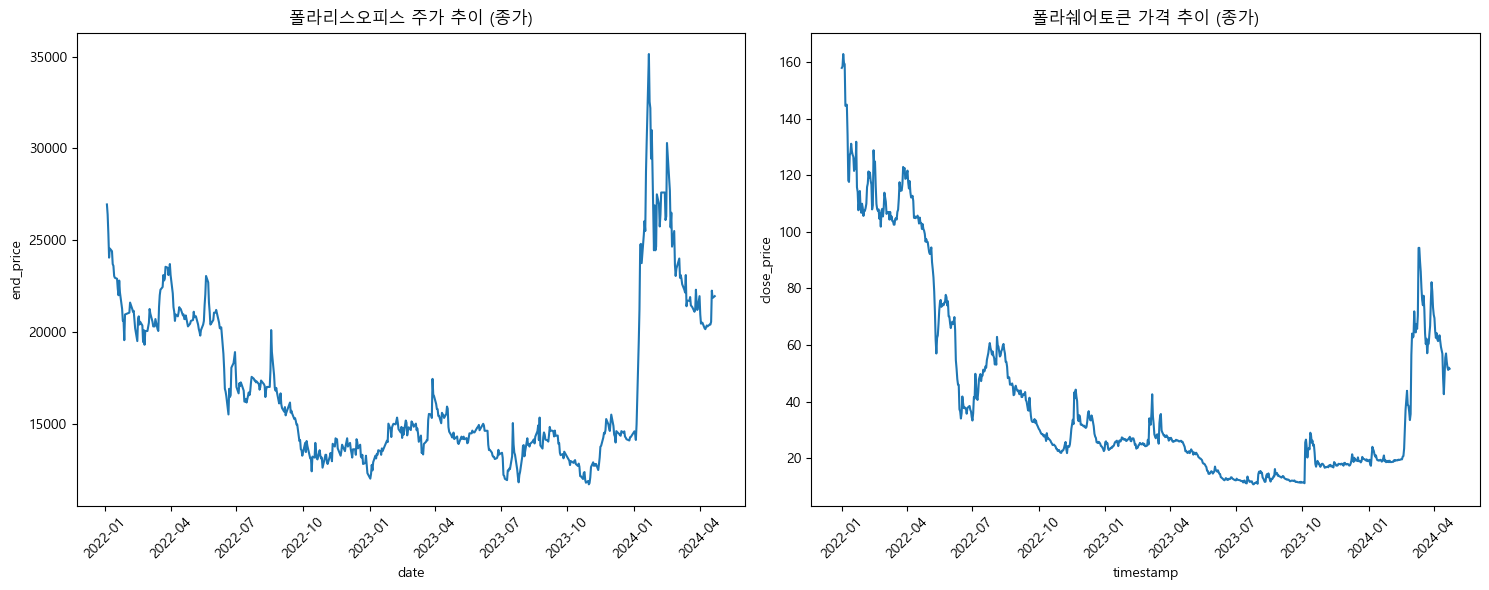

In [87]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=pola_stock, x='date', y='end_price')
plt.xticks(rotation = 45)
plt.title('폴라리스오피스 주가 추이 (종가)')

plt.subplot(1, 2, 2)
sns.lineplot(data=pola_token, x='timestamp', y='close_price')
plt.xticks(rotation = 45)
plt.title('폴라쉐어토큰 가격 추이 (종가)')

plt.tight_layout()

plt.show()

### 토큰 전일비 고가 추출

In [113]:
pola_token['daily_change'] = pola_token['close_price'] - pola_token['open_price'].apply(float)

C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\846092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pola_token['daily_change'] = pola_token['close_price'] - pola_token['open_price'].apply(float)


In [123]:
pola_token['check_point'] = (pola_token['daily_change'] / pola_token['close_price']) > 0.1

C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_21072\2887819795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pola_token['check_point'] = (pola_token['daily_change'] / pola_token['close_price']) > 0.1


In [125]:
df_check = pola_token.query('check_point == True')

In [128]:
df_check

timestamp open_price high_price low_price  close_price  \
452  2022-02-14      109.3      139.7     108.8       128.80   
575  2022-06-17      35.59         67     34.76        41.78   
591  2022-07-03       36.6      53.02     35.85        41.58   
593  2022-07-05       40.5         58     39.66        49.80   
623  2022-08-04      53.03      73.27     51.64        62.84   
721  2022-11-10      21.78      25.91     19.77        24.24   
730  2022-11-19      32.01      52.11     29.59        43.22   
773  2023-01-01      22.99         29      22.6        25.64   
834  2023-03-03      24.77         38     23.72        34.06   
837  2023-03-06      31.53      39.74     29.23        35.99   
838  2023-03-07      35.99      47.53      34.2        42.56   
848  2023-03-17      25.25      34.32     24.63        32.30   
925  2023-06-02      15.24      19.11     15.14        17.02   
970  2023-07-17      11.27       15.4      11.1        13.49   
985  2023-08-01      10.97      23.72     10.51        14.33   
996  2023-08-12       11.7      14.89     11.53        13.76   
1008 2023-08-24       13.5      17.77     13.27        16.13   
1050 2023-10-05      11.21      27.18     10.58        25.53   
1054 2023-10-09      20.21       24.6     17.14        23.24   
1057 2023-10-12      23.44      32.72     22.16        28.97   
1090 2023-11-14       16.7      20.07     16.29        18.60   
1142 2024-01-05      17.21      24.49     17.11        20.72   
1143 2024-01-06      20.72      26.67     20.72        24.00   
1187 2024-02-19      20.66      27.77     20.01        23.41   
1188 2024-02-20      23.41       36.8     23.03        29.91   
1189 2024-02-21      29.91         41     29.91        37.18   
1197 2024-02-29      35.33      62.92     34.61        56.42   
1198 2024-03-01      56.29      72.35     47.97        64.00   
1201 2024-03-04      63.01      82.81     63.01        71.86   
1207 2024-03-10      70.44        105     67.87        94.30   
1224 2024-03-27      66.78         81     64.21        75.31   
1243 2024-04-15      42.38      56.15     41.77        49.20   
1244 2024-04-16      49.35      61.84     48.41        55.46   

                       trade_volume  daily_change  check_point  
452    318558234.838791226485491126         19.50         True  
575    102273740.589603816416451454          6.19         True  
591      67601360.28607301361884872          4.98         True  
593     36838907.539216505537773423          9.30         True  
623    118342280.547024974512649645          9.81         True  
721     34201308.021229415775711328          2.46         True  
730    150200336.789853246135841884         11.21         True  
773     85044348.523969344873364672          2.65         True  
834    257526324.505983050688904397          9.29         True  
837    190830799.890379626513638597          4.46         True  
838    228578373.198650714409586322          6.57         True  
848     246930104.25168006364307018          7.05         True  
925     212626697.29611555177804613          1.78         True  
970    233208221.404764958967284371          2.22         True  
985    753465082.251523838323571288          3.36         True  
996    176638639.490523967696489094          2.06         True  
1008   258263889.461056299263672772          2.63         True  
1050  1032788153.969643805354902698         14.32         True  
1054   264839390.218942611464336648          3.03         True  
1057   664137728.578715439557120057          5.53         True  
1090   217189038.402479777269903717          1.90         True  
1142   500281775.869570577323647516          3.51         True  
1143   484029474.009089401880456919          3.28         True  
1187   353286587.116583448792173346          2.75         True  
1188  1108363859.835658733358120101          6.50         True  
1189   1080627085.46314532200582131          7.27         True  
1197  1148129675.712410497423481822         21.09         True  
1198   73

- 일일 10%이상 급등한 날 추출

In [127]:
check_date_list = df_check['timestamp']